### Library 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

### Pengumpulan Data

In [2]:
df = pd.read_csv('dataset_m.csv')

styled_df = df.head(10)
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#0000FF")]}
])
styled_df

,Timestamp,Nama Mahasiswa,Jenis Kelamin,Program Studi Kuliah,Asal Sekolah,Kota Asal
0,23/05/2024 23:29:18,Daniel Artha Wahyuda,Laki Laki,Akuntansi,SMK Kristen Kanaan,Tangerang
1,23/05/2024 23:31:22,Chanza Mudita Gouwtama,Perempuan,Akuntansi,SMK Mawar Sharon,Tangerang
2,23/05/2024 23:31:47,Djoel Tio Marihot Lumban,Laki Laki,Manejemen,SMK Negeri 3,Tangerang
3,23/05/2024 23:32:40,Immeka Tahta Nirvana,Perempuan,Manejemen,SMK Bina Bangsa,Tangerang
4,23/05/2024 23:33:48,Vanessa Wangsa,Perempuan,Hospitality & Pariwisata,SMK Mawar Saron,Tangerang
5,23/05/2024 23:34:30,Tiominta Christina Lumban,Perempuan,Manejemen,SMK Negeri 3,Tangerang
6,23/05/2024 23:37:17,Ribka Gracia,Perempuan,Manejemen,SMK Immanuel,Pontianak
7,23/05/2024 23:38:53,Develine Micshierly Zenada,Perempuan,Manejemen,SMK Budi Luhur,Tangerang
8,23/05/2024 23:40:02,Angel Andromeda,Perempuan,Manejemen,SMK Bonavita,Tangerang
9,23/05/2024 23:41:10,Melviana,Perempuan,Manejemen,SMK Bina Nusa Mandiri,Jakarta


### Pre-processing Data

In [3]:
df.shape

(99, 6)

In [4]:
df.dtypes

Timestamp               object
Nama Mahasiswa          object
Jenis Kelamin           object
Program Studi Kuliah    object
Asal Sekolah            object
Kota Asal               object
dtype: object

In [5]:
df.isnull().sum()

Timestamp               0
Nama Mahasiswa          0
Jenis Kelamin           0
Program Studi Kuliah    0
Asal Sekolah            0
Kota Asal               0
dtype: int64

In [6]:
df.duplicated().sum()

6

In [7]:
df = df.drop_duplicates(keep = 'first')

In [8]:
df.drop(columns=['Timestamp'], errors='ignore', inplace=True)

In [9]:
df.shape

(93, 5)

In [10]:
styled_df = df.head(10)
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#0000FF")]}
])
styled_df

,Nama Mahasiswa,Jenis Kelamin,Program Studi Kuliah,Asal Sekolah,Kota Asal
0,Daniel Artha Wahyuda,Laki Laki,Akuntansi,SMK Kristen Kanaan,Tangerang
1,Chanza Mudita Gouwtama,Perempuan,Akuntansi,SMK Mawar Sharon,Tangerang
2,Djoel Tio Marihot Lumban,Laki Laki,Manejemen,SMK Negeri 3,Tangerang
3,Immeka Tahta Nirvana,Perempuan,Manejemen,SMK Bina Bangsa,Tangerang
4,Vanessa Wangsa,Perempuan,Hospitality & Pariwisata,SMK Mawar Saron,Tangerang
5,Tiominta Christina Lumban,Perempuan,Manejemen,SMK Negeri 3,Tangerang
6,Ribka Gracia,Perempuan,Manejemen,SMK Immanuel,Pontianak
7,Develine Micshierly Zenada,Perempuan,Manejemen,SMK Budi Luhur,Tangerang
8,Angel Andromeda,Perempuan,Manejemen,SMK Bonavita,Tangerang
9,Melviana,Perempuan,Manejemen,SMK Bina Nusa Mandiri,Jakarta


In [11]:
def ganti_jenis_sekolah(asal_sekolah):
    if 'SMK' in asal_sekolah:
        return 2
    elif 'SMA' in asal_sekolah:
        return 1
    return asal_sekolah
jenis_kelamin_mapping = {'Laki Laki': 1, 'Perempuan': 2}
program_studi_mapping = {
    'Akuntansi': 1,
    'Manejemen': 2,
    'Hospitality & Pariwisata': 3,
    'Teknik Informatika': 4,
    'Fisika Medis': 5,
    'Statistika Kesehatan': 6,
    'DKV': 7,
    'Arsitektur': 8
}
kota_asal_mapping = {
    'Tangerang': 1,
    'Jakarta': 2,
    'Pontianak': 3,
    'Bandung': 4,
    'Bali': 5,
    'Bogor': 6,
    'Makassar': 7,
    'Batam': 8,
    'Medan': 9,
    'Sulawesi':10
}

df['Asal Sekolah'] = df['Asal Sekolah'].apply(ganti_jenis_sekolah)
df['Jenis Kelamin'] = df['Jenis Kelamin'].map(jenis_kelamin_mapping)
df['Program Studi Kuliah'] = df['Program Studi Kuliah'].map(program_studi_mapping)
df['Kota Asal'] = df['Kota Asal'].map(kota_asal_mapping)

In [12]:
styled_df = df.head(10).style
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#0000FF"), ('font-weight', 'bold')]}
])

,Nama Mahasiswa,Jenis Kelamin,Program Studi Kuliah,Asal Sekolah,Kota Asal
0,Daniel Artha Wahyuda,1,1,2,1
1,Chanza Mudita Gouwtama,2,1,2,1
2,Djoel Tio Marihot Lumban,1,2,2,1
3,Immeka Tahta Nirvana,2,2,2,1
4,Vanessa Wangsa,2,3,2,1
5,Tiominta Christina Lumban,2,2,2,1
6,Ribka Gracia,2,2,2,3
7,Develine Micshierly Zenada,2,2,2,1
8,Angel Andromeda,2,2,2,1
9,Melviana,2,2,2,2


### Data Visualization

In [13]:
plt.style.use('fivethirtyeight')

### Histograms

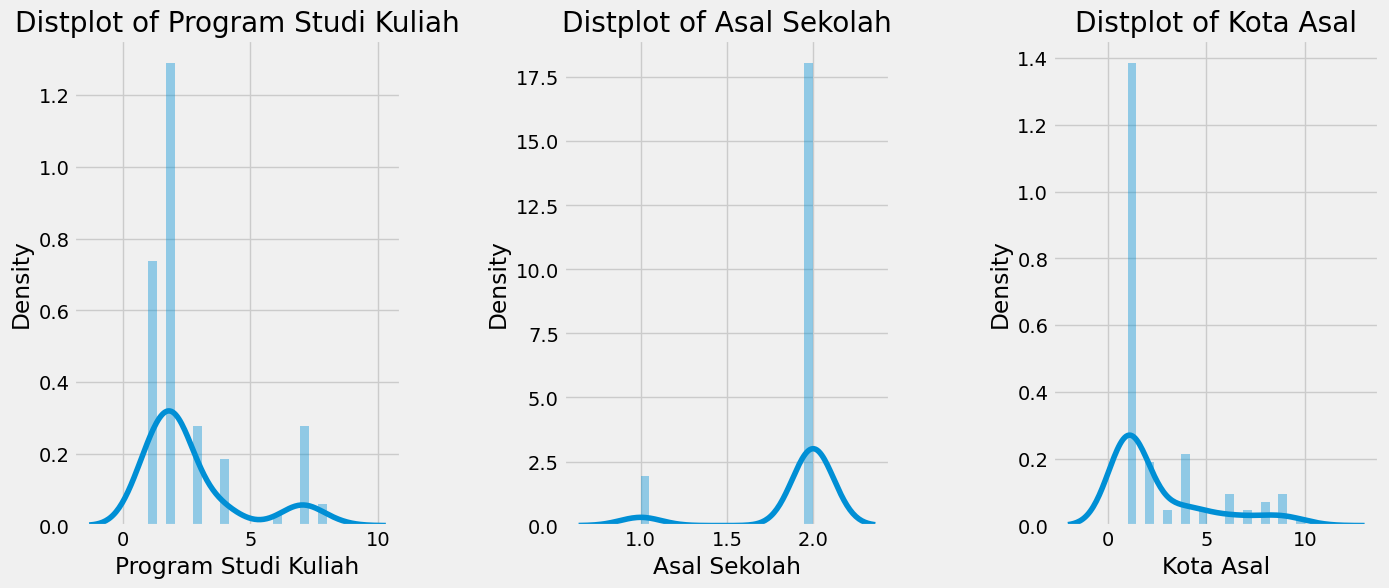

In [22]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Program Studi Kuliah' , 'Asal Sekolah' , 'Kota Asal']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

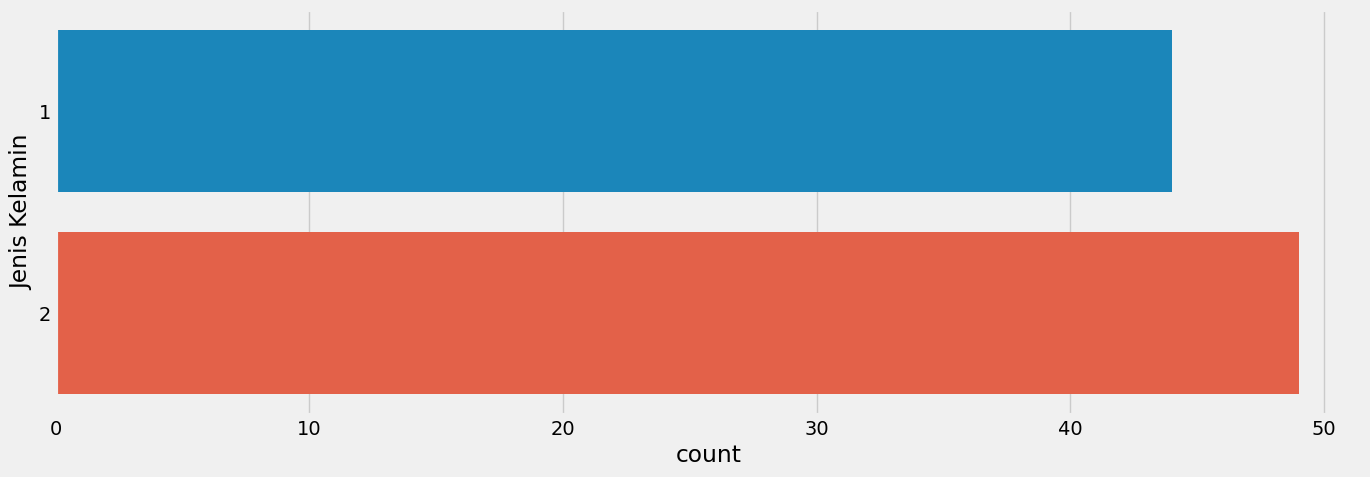

In [15]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Jenis Kelamin' , data = df)
plt.show()

### Clustering using K- means

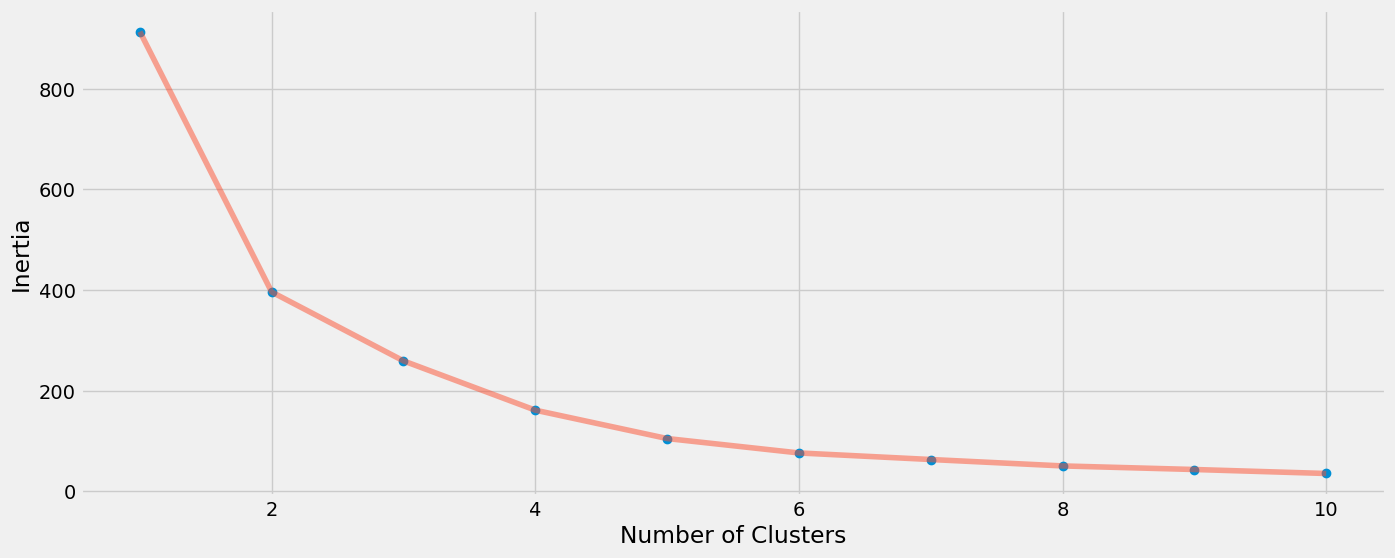

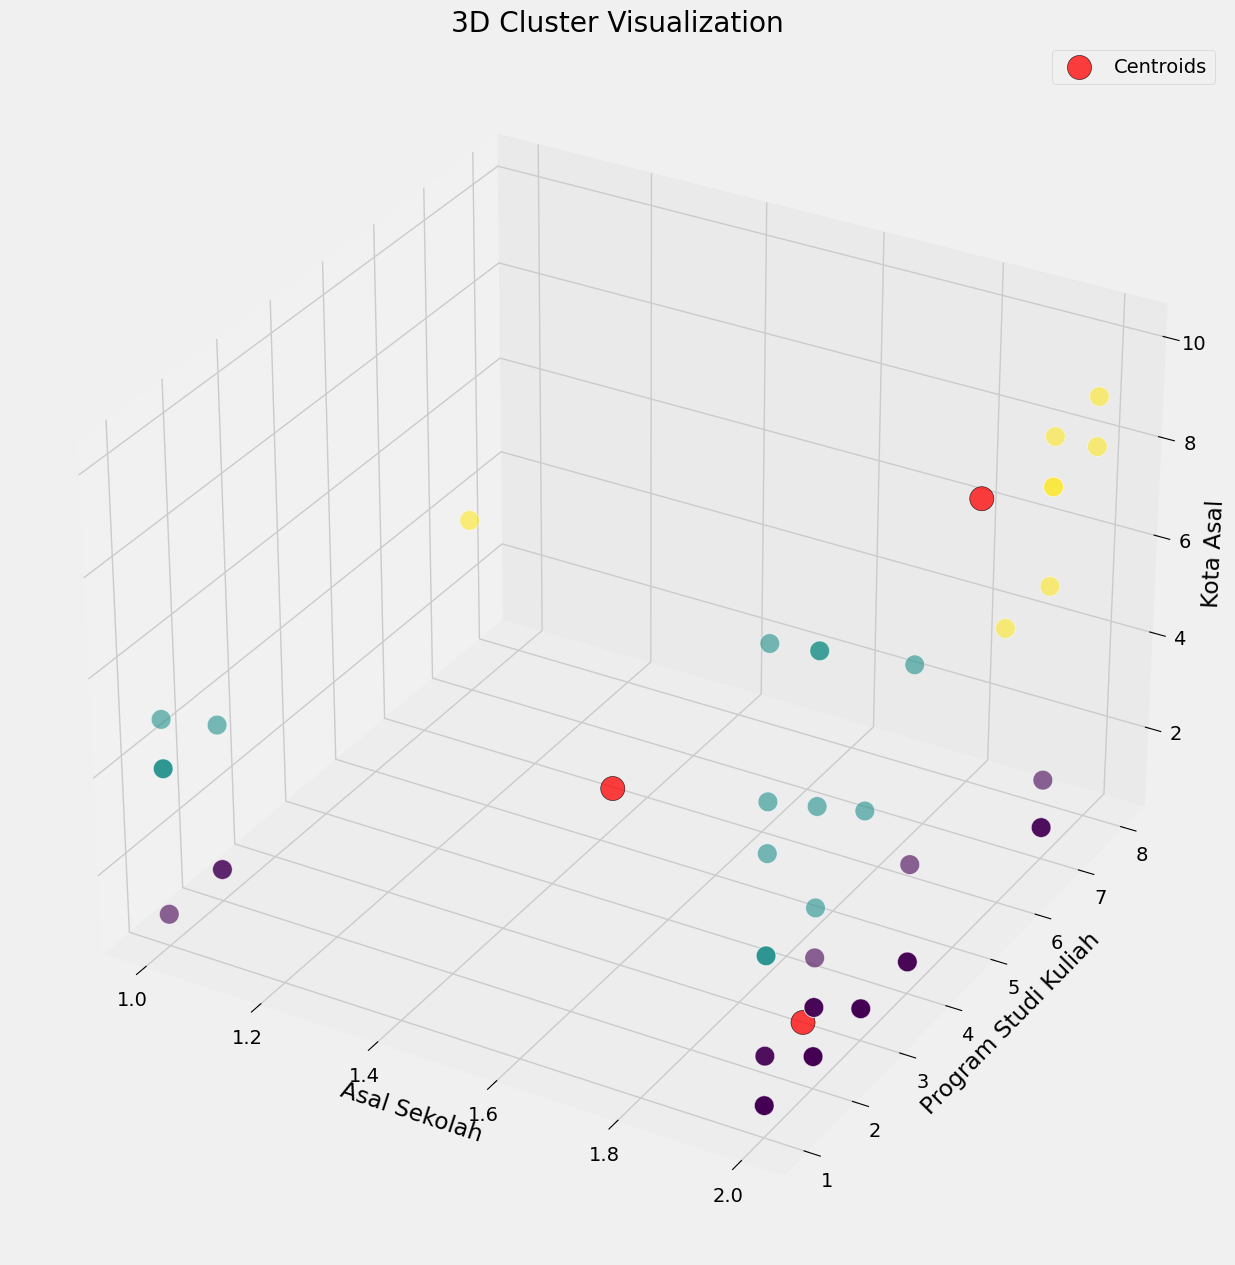

,Nama Mahasiswa,Program Studi Kuliah,Asal Sekolah,Kota Asal,Cluster
0,Daniel Artha Wahyuda,1,2,1,1
1,Chanza Mudita Gouwtama,1,2,1,1
2,Djoel Tio Marihot Lumban,2,2,1,1
3,Immeka Tahta Nirvana,2,2,1,1
4,Vanessa Wangsa,3,2,1,1
5,Tiominta Christina Lumban,2,2,1,1
6,Ribka Gracia,2,2,3,1
7,Develine Micshierly Zenada,2,2,1,1
8,Angel Andromeda,2,2,1,1
9,Melviana,2,2,2,1


In [16]:
X1 = df[['Asal Sekolah', 'Program Studi Kuliah', 'Kota Asal']].values

inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

n_clusters = 3
algorithm = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, 
                   tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

df['Cluster'] = labels1 + 1

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Asal Sekolah'], df['Program Studi Kuliah'], df['Kota Asal'], 
                c=labels1, s=200, cmap='viridis', alpha=0.6, edgecolors='w', depthshade=True)

ax.scatter(centroids1[:, 0], centroids1[:, 1], centroids1[:, 2], 
           s=300, c='red', label='Centroids', alpha=0.75, edgecolors='k')

ax.set_xlabel('Asal Sekolah')
ax.set_ylabel('Program Studi Kuliah')
ax.set_zlabel('Kota Asal')
plt.title('3D Cluster Visualization')

plt.legend(loc='best')
plt.show()

clustered_data = df[['Nama Mahasiswa', 'Program Studi Kuliah', 'Asal Sekolah', 'Kota Asal', 'Cluster']]
styled_df = clustered_data.head(100)
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#FF0000")]}
])
styled_df